# FASE 1: EXPLORACIÓN Y LIMPIEZA

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames 

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

## 1. EDA:

### 1.1. EDA Dataframe `df_vuelo`:

In [2]:
df_vuelo = pd.read_csv('files/Customer-Flight-Activity.csv')

In [3]:
df_vuelo.shape

(405624, 10)

In [4]:
df_vuelo.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [5]:
df_vuelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [6]:
df_vuelo.isnull().sum()/df_vuelo.shape[0]*100

Loyalty Number                 0.0
Year                           0.0
Month                          0.0
Flights Booked                 0.0
Flights with Companions        0.0
Total Flights                  0.0
Distance                       0.0
Points Accumulated             0.0
Points Redeemed                0.0
Dollar Cost Points Redeemed    0.0
dtype: float64

In [7]:
df_vuelo['Total Flights'].value_counts().sort_values(ascending=False)[:4]

Total Flights
0     197992
6      15273
10     14393
8      14056
Name: count, dtype: int64

In [8]:
#Observo a ver si hay duplicados:
df_vuelo[df_vuelo.duplicated(keep=False)].sort_values('Loyalty Number')[:10]

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
185953,101902,2017,12,0,0,0,0,0.0,0,0
185952,101902,2017,12,0,0,0,0,0.0,0,0
101447,101902,2017,7,0,0,0,0,0.0,0,0
101448,101902,2017,7,0,0,0,0,0.0,0,0
33844,101902,2017,3,0,0,0,0,0.0,0,0
33843,101902,2017,3,0,0,0,0,0.0,0,0
41,101902,2017,1,0,0,0,0,0.0,0,0
42,101902,2017,1,0,0,0,0,0.0,0,0
16942,101902,2017,2,0,0,0,0,0.0,0,0
16943,101902,2017,2,0,0,0,0,0.0,0,0


In [9]:
#Eliminamos estos duplicados
df_vuelo.drop_duplicates(inplace=True)

In [10]:
#Comprobamos que han desaparecido los duplicados:
df_vuelo[df_vuelo.duplicated(keep=False)].sort_values('Loyalty Number')

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed


`Comentario`: hay muchas filas para cada cliente, hemos hecho una prueba y vemos que podrían agruparse por Loyalty Number, Year y Month, y como función de agrupación, sumar las filas. Dejamos el razonamiento:

In [11]:
df_vuelo[df_vuelo['Loyalty Number'] == 992168][:12]
#el mismo cliente aparece muchas veces.
#parece que podría agruparse por cliente, year y month y que sumara las filas

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
16763,992168,2017,1,4,4,8,1264,126.0,0,0
16764,992168,2017,1,0,0,0,0,0.0,0,0
33664,992168,2017,2,0,0,0,0,0.0,0,0
50565,992168,2017,3,7,3,10,1090,109.0,0,0
50566,992168,2017,3,0,0,0,0,0.0,0,0
67466,992168,2017,4,13,0,13,3679,367.0,0,0
67467,992168,2017,4,0,0,0,0,0.0,0,0
84367,992168,2017,5,14,0,14,2688,268.0,0,0
84368,992168,2017,5,6,4,10,3680,368.0,0,0
100724,992168,2018,5,6,6,12,2868,286.0,416,34


In [12]:
df_vuelo.shape

(403760, 10)

In [13]:
df_vuelo_reducido = df_vuelo.groupby(['Loyalty Number', 'Year', 'Month'])[['Flights Booked','Flights with Companions', 'Total Flights', 'Distance','Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed']].sum().reset_index()

In [14]:
df_vuelo_reducido.shape #2072 filas menos

(401688, 10)

In [15]:
#comprobamos que ahora hay sólo hay una fila por mes y cliente:
df_vuelo_reducido[df_vuelo_reducido['Loyalty Number'] == 992168][:10] 

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
398400,992168,2017,1,4,4,8,1264,126.0,0,0
398401,992168,2017,2,0,0,0,0,0.0,0,0
398402,992168,2017,3,7,3,10,1090,109.0,0,0
398403,992168,2017,4,13,0,13,3679,367.0,0,0
398404,992168,2017,5,20,4,24,6368,636.0,0,0
398405,992168,2017,6,0,0,0,0,0.0,0,0
398406,992168,2017,7,31,4,35,9716,970.0,0,0
398407,992168,2017,8,9,0,9,1620,162.0,0,0
398408,992168,2017,9,0,0,0,0,0.0,0,0
398409,992168,2017,10,14,5,19,4379,437.0,0,0


In [16]:
df_vuelo_reducido.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

In [17]:
df_vuelo_reducido[['Flights Booked','Flights with Companions', 'Total Flights', 'Distance','Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed']].describe().T

,count,mean,std,min,25%,50%,75%,max
Flights Booked,401688.0,4.155374,5.269271,0.0,0.0,1.0,8.0,39.0
Flights with Companions,401688.0,1.041916,2.090835,0.0,0.0,0.0,1.0,20.0
Total Flights,401688.0,5.197290,6.576952,0.0,0.0,1.0,10.0,57.0
Distance,401688.0,1220.725451,1446.440549,0.0,0.0,524.0,2352.0,11244.0
Points Accumulated,401688.0,124.904743,147.982107,0.0,0.0,53.0,240.0,1216.5
Points Redeemed,401688.0,30.997660,126.104987,0.0,0.0,0.0,0.0,996.0
Dollar Cost Points Redeemed,401688.0,2.508848,10.200090,0.0,0.0,0.0,0.0,80.0


### 1.2. EDA Dataframe `df_cliente`:

In [18]:
df_cliente = pd.read_csv('files/Customer-Loyalty-History.csv')
df_cliente.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [19]:
df_cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [20]:
df_cliente['Enrollment Type'].unique()

array(['Standard', '2018 Promotion'], dtype=object)

In [21]:
df_cliente.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')

In [22]:
#Análisis de los nulos:
df_cliente.isnull().sum()/df_vuelo.shape[0]*100

Loyalty Number        0.000000
Country               0.000000
Province              0.000000
City                  0.000000
Postal Code           0.000000
Gender                0.000000
Education             0.000000
Salary                1.049633
Marital Status        0.000000
Loyalty Card          0.000000
CLV                   0.000000
Enrollment Type       0.000000
Enrollment Year       0.000000
Enrollment Month      0.000000
Cancellation Year     3.633347
Cancellation Month    3.633347
dtype: float64

In [23]:
#tienen el mismo número de nulos, es decir, son nulos en las mismas filas (he hecho un análisis de varios pares de datos):
#intentar sustituir quitar nulos porque los "nulos" por "0",porque realmente no es que sean nulos, si no que todavía siguen siendo miembros.
df_cliente[['Cancellation Year', 'Cancellation Month']].isnull().sum() 

Cancellation Year     14670
Cancellation Month    14670
dtype: int64

In [24]:
#Para las estadísticas, vamos a separar por objets y números:
df_cliente.select_dtypes(include = 'O').describe().T

,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


In [25]:
df_cliente.select_dtypes(exclude='O').columns

Index(['Loyalty Number', 'Salary', 'CLV', 'Enrollment Year',
       'Enrollment Month', 'Cancellation Year', 'Cancellation Month'],
      dtype='object')

In [26]:
#Para las estadísticas, vamos a separar números:
df_cliente[['Salary', 'CLV', 'Enrollment Year','Enrollment Month', 'Cancellation Year', 'Cancellation Month']].describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Salary,12499.0,79245.61,35008.30,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.90,6860.98,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.25,1.98,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.67,3.40,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.50,1.38,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.96,3.46,1.00,4.00,7.00,10.00,12.00


In [27]:
#parece que hay salarios negativos:
df_cliente[df_cliente['Salary'] < 0][:10]

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
1082,542976,Canada,Quebec,Montreal,H2Y 4R4,Male,High School or Below,-49830.0,Divorced,Star,24127.50,2018 Promotion,2018,3,NaN,NaN
1894,959977,Canada,British Columbia,Vancouver,V5R 1W3,Female,Bachelor,-12497.0,Married,Aurora,9453.00,2018 Promotion,2018,3,NaN,NaN
2471,232755,Canada,British Columbia,Vancouver,V1E 4R6,Female,Bachelor,-46683.0,Single,Nova,4787.81,2018 Promotion,2018,3,NaN,NaN
3575,525245,Canada,British Columbia,Victoria,V10 6T5,Male,Bachelor,-45962.0,Married,Star,2402.33,2018 Promotion,2018,3,NaN,NaN
3932,603070,Canada,British Columbia,West Vancouver,V6V 8Z3,Female,Bachelor,-19325.0,Single,Star,2893.74,2018 Promotion,2018,3,NaN,NaN
4712,491242,Canada,British Columbia,Dawson Creek,U5I 4F1,Male,Bachelor,-43234.0,Married,Star,7597.91,2018 Promotion,2018,3,NaN,NaN
6560,115505,Canada,Newfoundland,St. John's,A1C 6H9,Male,Bachelor,-10605.0,Married,Nova,5860.17,2018 Promotion,2018,4,NaN,NaN
6570,430398,Canada,Newfoundland,St. John's,A1C 6H9,Male,Bachelor,-17534.0,Married,Nova,49423.80,2018 Promotion,2018,3,NaN,NaN
7373,152016,Canada,Ontario,Toronto,P1J 8T7,Female,Bachelor,-58486.0,Married,Aurora,5067.21,2018 Promotion,2018,2,NaN,NaN
8576,194065,Canada,Ontario,Sudbury,M5V 1G5,Female,Bachelor,-31911.0,Married,Nova,2888.85,2018 Promotion,2018,2,NaN,NaN


In [28]:
#hay 20 filas con salarios negativos, lo limpiamos en el siguiente apartado de limpieza
df_cliente[df_cliente['Salary'] < 0].shape 

(20, 16)

In [29]:
#Observo a ver si hay duplicados:
df_cliente[df_cliente.duplicated(keep=False)]

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month


In [30]:
df_cliente.duplicated().sum() #efectivamente, no hay duplicados

np.int64(0)

## 2. UNIÓN DE LOS DOS CONJUNTOS DE DATOS:

Observaciones sobre la unión:

- Usaremos la columna `Loyalty Number` para unir ambos csv. 

- Los uniremos con un `merge` porque ambos tienen en común esta columna. 

- Dado que estamos analizando el comportamiento de los clientes dentro de un programa de lealtad de una aerolínea, usaremos `how` = `left` con los `clientes` en left, porque sí queremos que aparezcan todos los clientes (aunque no tengan vuelos), pero no nos interesa que nos aparezcan los vuelos (sin clientes asignados). 


In [31]:
df_vuelo_reducido.shape

(401688, 10)

In [32]:
df_cliente.shape

(16737, 16)

In [33]:
df = df_cliente.merge(df_vuelo_reducido, how='left', on='Loyalty Number')

In [34]:
df.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,1,0,0,0,0,0.0,0,0
1,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,2,3,0,3,2823,282.0,0,0
2,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,3,0,0,0,0,0.0,0,0
3,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,4,0,0,0,0,0.0,0,0
4,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,5,13,4,17,3757,375.0,0,0


In [35]:
df.shape #25 columnas= 10 de un df y 16 de otro (y comparten 1 col en común)

(401688, 25)

In [36]:
df.duplicated().sum() #no hay duplicados

np.int64(0)

In [37]:
#guardamos el csv que acabamos de crear:
df.to_csv('files/datos_totales.csv', index=False)

## 3. LIMPIEZA DE DATOS:


In [38]:
df = pd.read_csv('files/datos_totales.csv')

In [40]:
#Comprobamos los duplicados de nuevo, que tienen que ser 0:
df.duplicated().sum() #efectivamente, no hay duplicados

np.int64(0)

Vamos a transformar los nombres de las columnas a todo en minuscula y con "_" en lugar de espacios:


In [41]:
#cambiamos los nombres de las columnas para que sean más sencillas de escribir:
df.columns = df.columns.str.lower().str.replace(' ', '_').str.strip()

In [42]:
df.sample(5) #cambio realizado correctamente

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
170880,621218,Canada,Ontario,Toronto,P1L 8X8,Male,Bachelor,64625.0,Single,Nova,6085.30,Standard,2015,9,NaN,NaN,2017,1,13,6,19,1501,150.0,0,0
370946,187291,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,Bachelor,62706.0,Married,Star,9386.75,Standard,2017,12,NaN,NaN,2017,3,0,0,0,0,0.0,0,0
361662,687170,Canada,Ontario,Toronto,P5S 6R4,Male,Bachelor,81028.0,Married,Star,8406.76,Standard,2016,6,NaN,NaN,2017,7,0,0,0,0,0.0,0,0
194286,454720,Canada,Alberta,Peace River,T9O 2W2,Male,Bachelor,83520.0,Divorced,Nova,8339.00,Standard,2016,6,NaN,NaN,2017,7,0,0,0,0,0.0,0,0
251998,378793,Canada,Quebec,Montreal,H2T 9K8,Female,Bachelor,93227.0,Single,Star,2444.33,Standard,2013,1,NaN,NaN,2018,11,0,0,0,0,0.0,0,0


In [43]:
#Análisis de los nulos, de nuevo:
df.isnull().sum()/df.shape[0]*100

loyalty_number                  0.000000
country                         0.000000
province                        0.000000
city                            0.000000
postal_code                     0.000000
gender                          0.000000
education                       0.000000
salary                         25.321145
marital_status                  0.000000
loyalty_card                    0.000000
clv                             0.000000
enrollment_type                 0.000000
enrollment_year                 0.000000
enrollment_month                0.000000
cancellation_year              87.650117
cancellation_month             87.650117
year                            0.000000
month                           0.000000
flights_booked                  0.000000
flights_with_companions         0.000000
total_flights                   0.000000
distance                        0.000000
points_accumulated              0.000000
points_redeemed                 0.000000
dollar_cost_poin

- `Cancellation Year`, `Cancellation Month`: Tras el merge, tenemos estas filas de clientes duplicadas porque necesitamos rellenar los vuelos asignados a ese cliente, por eso ha aumentado el número de nulos:

    - Hemos eliminado los nulos igualando el dato a cero, porque hemos comprobado con la empresa que si no había dato significaba que todavía seguían en este programa de lealtad.

    -  Hemos creado una columna una columna que se llama `still_client_loyalty` y que sea un booleano: SI o NO. Los 0 de la columna `Cancelation` significarán que todavía siguen siendo miembros del programa lealtad, y los que tienen fecha de cancelación, serán los que ya no forman parte del plan.

`'cancellation_year', 'cancellation_month'`: son columnas de tipo float64 que vamos a convertir a int64 y los nulos de estas columnas, los vamos a transformar a "0".

In [44]:
def convertir_a_int (dato):
    """convertir_a_int: convierte datos a integer

    Arguments:
        dato {str, float} -- dato insertado para convertir a integer

    Returns:
        int -- dato convertido a int
    """
    try:
        return int(dato)

    except: #para los nulos:
        return 0

In [45]:
x = np.nan

In [46]:
x = convertir_a_int(x)

In [47]:
type(x)

int

In [48]:
#ejecutamos la función
col_datatime = ['cancellation_year', 'cancellation_month']

for col in col_datatime:
    df[col] = df[col].apply(convertir_a_int)

In [49]:
#comprobamos que la función ha funcionado correctamente
df[['cancellation_year', 'cancellation_month']].sample(5)

,cancellation_year,cancellation_month
256525,0,0
129138,0,0
381691,0,0
351963,2018,8
223444,0,0


In [50]:
#creamos la nueva columna:
df['still_client_loyalty'] = df.apply(lambda celda : "si" if celda['cancellation_year'] == 0 and celda['cancellation_month'] == 0 else "no", axis = 1)

In [51]:
df['still_client_loyalty'].unique()

array(['si', 'no'], dtype=object)

In [54]:
#comprobamos que los resultados de la nueva col nos cuadran:
df[['cancellation_year', 'cancellation_month', 'still_client_loyalty']].sample(5)

,cancellation_year,cancellation_month,still_client_loyalty
322099,0,0,si
310447,0,0,si
315149,0,0,si
295770,2017,2,no
122733,0,0,si


In [55]:
#comprobamos que se ha hecho bien el cambio: aquí en unique sólo pueden aparecer "si"
df['still_client_loyalty'][(df['cancellation_year'] == 0) & (df['cancellation_month'] == 0)].unique()

array(['si'], dtype=object)

In [56]:
#comprobamos que se ha hecho bien el cambio: aquí en unique sólo pueden aparecer "no"
df['still_client_loyalty'][(df['cancellation_year'] != 0) & (df['cancellation_month'] != 0)].unique()

array(['no'], dtype=object)

In [57]:
df['still_client_loyalty'].describe() #el 'si' es más frecuente, con 87.65% de los datos (=352080/401688)

count     401688
unique         2
top           si
freq      352080
Name: still_client_loyalty, dtype: object

In [58]:
#Revisión final de nulos en df:
df.isnull().sum()/df.shape[0]*100

loyalty_number                  0.000000
country                         0.000000
province                        0.000000
city                            0.000000
postal_code                     0.000000
gender                          0.000000
education                       0.000000
salary                         25.321145
marital_status                  0.000000
loyalty_card                    0.000000
clv                             0.000000
enrollment_type                 0.000000
enrollment_year                 0.000000
enrollment_month                0.000000
cancellation_year               0.000000
cancellation_month              0.000000
year                            0.000000
month                           0.000000
flights_booked                  0.000000
flights_with_companions         0.000000
total_flights                   0.000000
distance                        0.000000
points_accumulated              0.000000
points_redeemed                 0.000000
dollar_cost_poin

In [59]:
df.select_dtypes(exclude='O').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401688 entries, 0 to 401687
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loyalty_number               401688 non-null  int64  
 1   salary                       299976 non-null  float64
 2   clv                          401688 non-null  float64
 3   enrollment_year              401688 non-null  int64  
 4   enrollment_month             401688 non-null  int64  
 5   cancellation_year            401688 non-null  int64  
 6   cancellation_month           401688 non-null  int64  
 7   year                         401688 non-null  int64  
 8   month                        401688 non-null  int64  
 9   flights_booked               401688 non-null  int64  
 10  flights_with_companions      401688 non-null  int64  
 11  total_flights                401688 non-null  int64  
 12  distance                     401688 non-null  int64  
 13 

In [60]:
df.select_dtypes(include='O').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401688 entries, 0 to 401687
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   country               401688 non-null  object
 1   province              401688 non-null  object
 2   city                  401688 non-null  object
 3   postal_code           401688 non-null  object
 4   gender                401688 non-null  object
 5   education             401688 non-null  object
 6   marital_status        401688 non-null  object
 7   loyalty_card          401688 non-null  object
 8   enrollment_type       401688 non-null  object
 9   still_client_loyalty  401688 non-null  object
dtypes: object(10)
memory usage: 30.6+ MB


In [61]:
#vamos a convertir la columna salary en valor absoluto:
df['salary']= df['salary'].abs()

In [62]:
#Comprobamos si sigue habiendo salarios negativos:
df[df['salary'] < 0]

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,still_client_loyalty


In [63]:
#Hemos visto arriba que en esta columna hay 101712 nulos (25.32%)
df['salary'].isnull().sum() 

np.int64(101712)

In [64]:
# Filtrar filas donde 'salary' es NaN:
df[df['salary'].isnull()].sample(5)

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,still_client_loyalty
348011,978349,Canada,New Brunswick,Moncton,E1A 2A7,Female,College,NaN,Single,Star,7260.83,Standard,2017,2,0,0,2017,12,6,0,6,2178,217.0,0,0,si
369304,124351,Canada,Quebec,Hull,J8Y 3Z5,Female,College,NaN,Single,Star,4774.38,2018 Promotion,2018,3,0,0,2018,5,0,0,0,0,0.0,0,0,si
400967,409984,Canada,Yukon,Whitehorse,Y2K 6R0,Male,College,NaN,Single,Star,7452.23,2018 Promotion,2018,4,2018,12,2018,12,2,1,3,2958,295.0,0,0,no
12918,765252,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Star,4749.13,Standard,2014,3,0,0,2017,7,0,0,0,0,0.0,0,0,si
221260,174925,Canada,British Columbia,Whistler,V6T 1Y8,Male,College,NaN,Single,Nova,14666.23,Standard,2014,7,2016,4,2017,5,0,0,0,0,0.0,0,0,no


In [65]:
# Filtrar filas donde 'salary' es NaN y donde tenemos el mismo lolalty_numer
df[(df['salary'].isnull()) & (df['loyalty_number'] == 842379)][:5]

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,still_client_loyalty
22680,842379,Canada,British Columbia,Vancouver,V1E 4R6,Male,College,NaN,Married,Aurora,5182.46,Standard,2018,12,0,0,2017,1,0,0,0,0,0.0,0,0,si
22681,842379,Canada,British Columbia,Vancouver,V1E 4R6,Male,College,NaN,Married,Aurora,5182.46,Standard,2018,12,0,0,2017,2,0,0,0,0,0.0,0,0,si
22682,842379,Canada,British Columbia,Vancouver,V1E 4R6,Male,College,NaN,Married,Aurora,5182.46,Standard,2018,12,0,0,2017,3,15,0,15,2235,223.0,0,0,si
22683,842379,Canada,British Columbia,Vancouver,V1E 4R6,Male,College,NaN,Married,Aurora,5182.46,Standard,2018,12,0,0,2017,4,10,5,15,2940,294.0,0,0,si
22684,842379,Canada,British Columbia,Vancouver,V1E 4R6,Male,College,NaN,Married,Aurora,5182.46,Standard,2018,12,0,0,2017,5,3,0,3,2790,279.0,0,0,si


In [66]:
# Vamos a ver si este cliente tiene salario en alguna linea:
df[(df['salary'].notnull()) & (df['loyalty_number'] == 326905)][:5]
#parece que no tiene salario en ninguna otra línea... Vamos a probar con otros

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,still_client_loyalty


In [67]:
# Vamos a ver si este cliente tiene salario en alguna linea:
df[(df['salary'].notnull()) & (df['loyalty_number'] == 920716)][:5]
#parece que no tiene salario en ninguna otra línea... Vamos a probar con otros

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,still_client_loyalty


In [68]:
# Vamos a ver si este cliente tiene salario en alguna linea:
df[(df['salary'].notnull()) & (df['loyalty_number'] == 266561)][:5]
#parece que no tiene salario en ninguna otra línea...

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,still_client_loyalty


Parece que no vamos a poder imputar estos nulos de esta forma. Vemos a ver comparando con otras columnas con las que tengan relación. Voy a ver la distribución de los salarios:

In [69]:
#creo nuestra nueva columna:
df['salary_range'] = pd.cut(x = df['salary'], bins = 4, labels = ['bajo', 'medio-bajo', 'medio-alto', 'alto'])

In [70]:
df['salary_range'].unique()

['bajo', NaN, 'medio-bajo', 'medio-alto', 'alto']
Categories (4, object): ['bajo' < 'medio-bajo' < 'medio-alto' < 'alto']

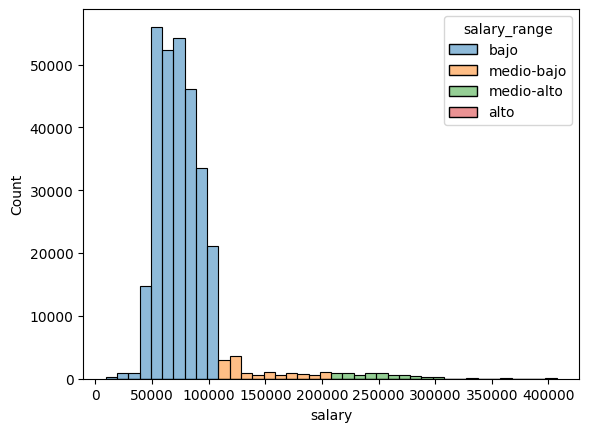

In [71]:
#Casi todos nuestros datos están en la parte de salario bajo:
sns.histplot(x = "salary", 
             data = df,
             hue = 'salary_range',
             bins = 40);

Voy a intentar ver la relación de `salary` con `gender` y `education`. Para ello, voy a pasar `gender` y `education` a numérico:

In [72]:
df_imputacion_salario = df[['salary_range', 'gender', 'education']]

In [73]:
#Antes de hacer ningún cambio:
for col in df_imputacion_salario:
    print(col)
    print(df[col].unique())
    print('-' * 40)

salary_range
['bajo', NaN, 'medio-bajo', 'medio-alto', 'alto']
Categories (4, object): ['bajo' < 'medio-bajo' < 'medio-alto' < 'alto']
----------------------------------------
gender
['Female' 'Male']
----------------------------------------
education
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
----------------------------------------


In [75]:
#ahora vamos a usar pd.factorize() que convierte los valores únicos de una serie/col en números enteros únicos.
df_imputacion_salario = df_imputacion_salario.apply(lambda x: pd.factorize(x)[0])

In [76]:
#Después de hacer factorize():
for col in df_imputacion_salario:
    print(col)
    print(df_imputacion_salario[col].unique())
    print('-' * 40)

salary_range
[ 0 -1  1  2  3]
----------------------------------------
gender
[0 1]
----------------------------------------
education
[0 1 2 3 4]
----------------------------------------


In [77]:
#utilizamos el metodo spearman porque las columnas son rangos de datos:
df_imputacion_salario[['salary_range', 'gender', 'education']].corr(method='spearman')

,salary_range,gender,education
salary_range,1.000000,-0.011636,-0.384961
gender,-0.011636,1.000000,0.002922
education,-0.384961,0.002922,1.000000


Dado que no hay grandes correlaciones entre las variables, no vamos a imputar nulos en la columna salarios.

In [80]:
df.to_csv('files/datos_totales_clean.csv', index = False)